## Importing Data and libraries

In [46]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
df = pd.read_csv('Titanic.csv') # Read data from csv file

In [16]:
df.head() #display top 5 rows of the data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.tail() #display last 5 rows of the data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Check basic statistics and information about the data

In [20]:
df.describe()  #Check basic statistics of numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df.info() #information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning

In [28]:
df.isnull().sum() #find the null values in the data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df["Cabin"].fillna("Unknown", inplace=True)

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [38]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Explore the relationships between variables and identify patterns

### Relationship between survival and other variables

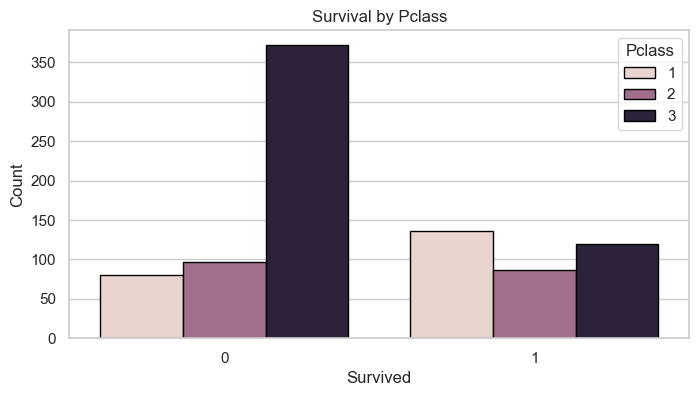

In [111]:
#Relationship between Survival and Pclass

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(x="Survived", hue="Pclass", data=df, edgecolor = 'black')
plt.ylabel("Count")
plt.title("Survival by Pclass")
plt.show()

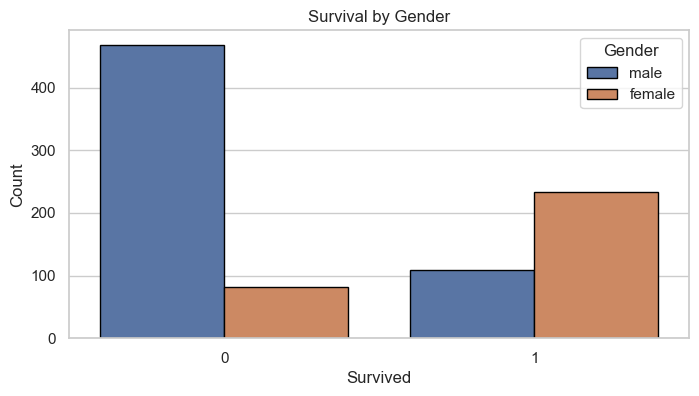

In [113]:
#Relationship between Survival and Gender

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(x="Survived", hue="Sex", data=df, edgecolor = 'black')
plt.legend(title="Gender", loc="upper right")
plt.ylabel("Count")
plt.title("Survival by Gender")
plt.show()

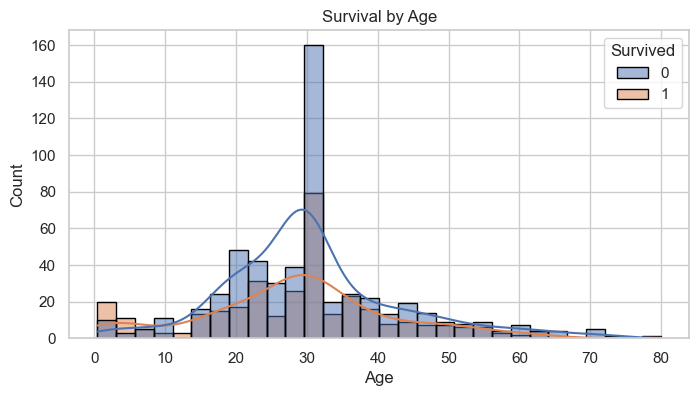

In [101]:
#Relationship between Survival and Age

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', kde=True, hue='Survived', common_norm=False, edgecolor = 'black')
plt.title("Survival by Age")
plt.show()

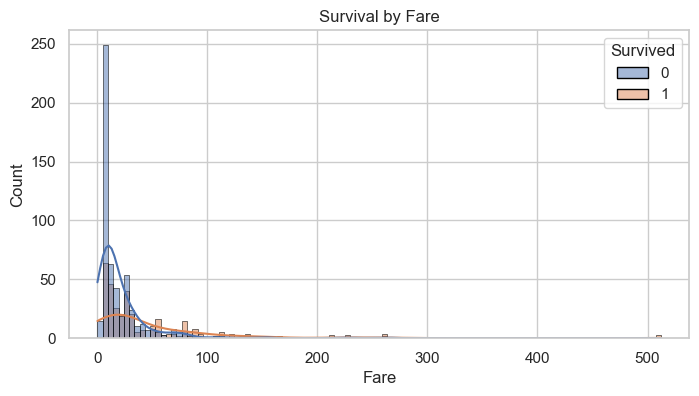

In [99]:
#Relationship between Survival and Fare
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Fare', kde=True, hue='Survived', common_norm=False, edgecolor = 'black')
plt.title("Survival by Fare")
plt.show()

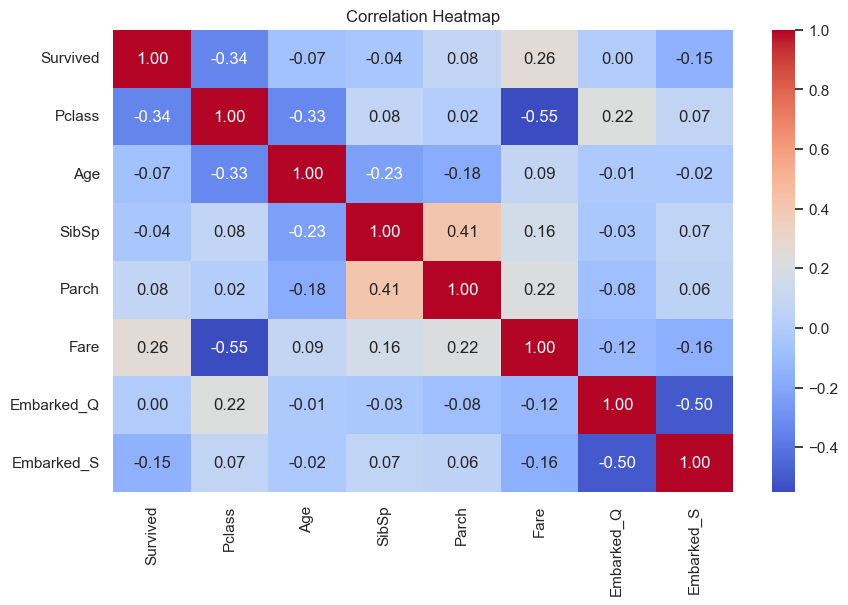

In [85]:
# One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Now, run the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

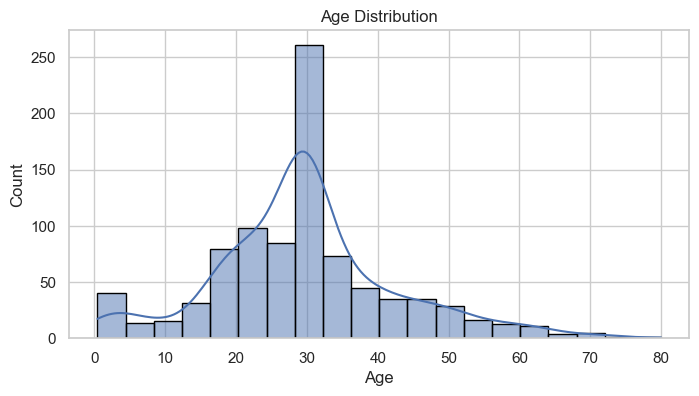

In [95]:
# Explore the distribution of passengers' ages
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', kde=True, bins=20, edgecolor = 'black')
plt.title("Age Distribution")
plt.show()

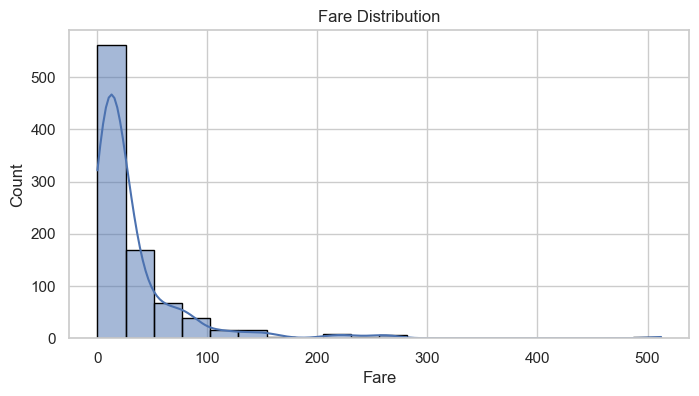

In [97]:
# Explore the distribution of passengers' fares
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Fare', kde=True, bins=20, edgecolor = 'black')
plt.title("Fare Distribution")
plt.show()